<a href="https://colab.research.google.com/github/HilbertN/Analisis_Multivariado_Tareas/blob/main/Tarea2_AnalisisMultivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from numpy import pi, arctan
import matplotlib.patches
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Ejercicio 1

In [ ]:
mg=sns.load_dataset('mpg')
mg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


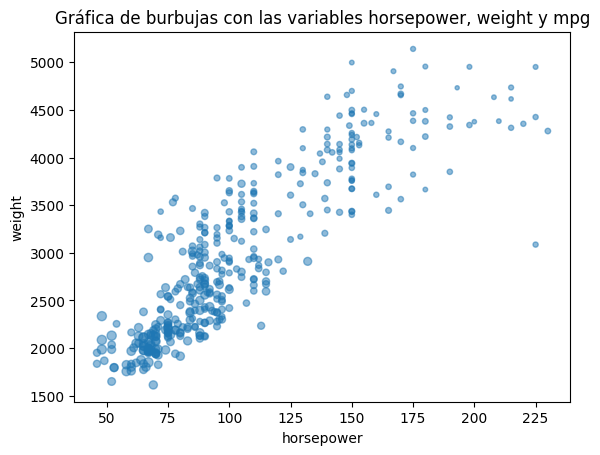

In [ ]:
#a)
plt.scatter(mg['horsepower'],mg['weight'],s=mg['mpg'],alpha=0.5)
plt.xlabel('horsepower')
plt.ylabel('weight')
plt.title('Gráfica de burbujas con las variables horsepower, weight y mpg')
plt.savefig('Ej1_a.png')

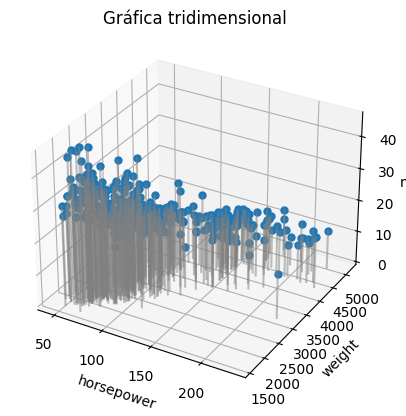

In [ ]:
# b)
# crear ejes y figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en el espacio 3D
ax.plot(mg['horsepower'], mg['weight'], mg['mpg'], marker='o', linestyle='', label='Puntos 3D',markersize=5)

# Graficar líneas desde cada punto hasta el plano XY (z=0)
for i in range(len(mg)):
    x, y, z = mg.iloc[i][['horsepower', 'weight', 'mpg']]
    ax.plot([x, x], [y, y], [0, z], color='gray',alpha=0.5)

# Etiquetas y título
ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')
ax.set_title('Gráfica tridimensional')

# Mostrar gráfico
plt.savefig('Ej1_b.png')
plt.show()

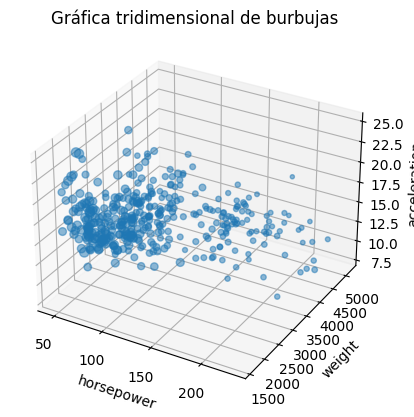

In [ ]:
#c)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(mg['horsepower'], mg['weight'], mg['acceleration'], s=mg['mpg'],alpha=0.5)



ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('acceleration')
ax.set_title('Gráfica tridimensional de burbujas')
plt.savefig('Ej1_c.png')
plt.show()

In [ ]:
#d)
def cface(ax, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18):
    # x1 = height  of upper face
    # x2 = overlap of lower face
    # x3 = half of vertical size of face
    # x4 = width of upper face
    # x5 = width of lower face
    # x6 = length of nose
    # x7 = vertical position of mouth
    # x8 = curvature of mouth
    # x9 = width of mouth
    # x10 = vertical position of eyes
    # x11 = separation of eyes
    # x12 = slant of eyes
    # x13 = eccentricity of eyes
    # x14 = size of eyes
    # x15 = position of pupils
    # x16 = vertical position of eyebrows
    # x17 = slant of eyebrows
    # x18 = size of eyebrows

    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)

    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = matplotlib.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', edgecolor='black', linewidth=2)
    # e.set_clip_box(ax.bbox)
    # e.set_facecolor([0,0,0])
    ax.add_artist(e)

    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = matplotlib.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', edgecolor='black', linewidth=2)
    ax.add_artist(e)

    # cover overlaps
    e = matplotlib.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)
    e = matplotlib.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', edgecolor='black', ec='none')
    ax.add_artist(e)

    # draw nose
    ax.plot([0,0], [-x6/2, x6/2], 'k')

    # draw mouth
    p = matplotlib.patches.Arc( (0,-x7+.5/x8), 1/x8, 1/x8, theta1=270-180/np.pi*np.arctan(x8*x9), theta2=270+180/np.pi*np.arctan(x8*x9))
    ax.add_artist(p)

    # draw eyes
    p = matplotlib.patches.Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/np.pi*x12, facecolor='white', edgecolor='black')
    ax.add_artist(p)

    p = matplotlib.patches.Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/np.pi*x12, facecolor='white', edgecolor='black')
    ax.add_artist(p)

    # draw pupils
    p = matplotlib.patches.Ellipse( (-x11-x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = matplotlib.patches.Ellipse( (x11+x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)

    # draw eyebrows
    ax.plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    ax.plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')






In [ ]:
#Conjunto de datos
fc = pd.DataFrame({
    'horsepower': mg['horsepower'],
    'weight': mg['weight'],
    'acceleration': mg['acceleration'],
    'mpg': mg['mpg'],
    'displacement': mg['displacement']
})
#Normalizamos datos
scaler = MinMaxScaler()

fc_n = pd.DataFrame(scaler.fit_transform(fc), columns=fc.columns)
fc_n


,horsepower,weight,acceleration,mpg,displacement
0,0.456522,0.536150,0.238095,0.239362,0.617571
1,0.646739,0.589736,0.208333,0.159574,0.728682
2,0.565217,0.516870,0.178571,0.239362,0.645995
3,0.565217,0.516019,0.238095,0.186170,0.609819
4,0.510870,0.520556,0.148810,0.212766,0.604651
...,...,...,...,...,...
393,0.217391,0.333711,0.452381,0.478723,0.186047
394,0.032609,0.146583,0.988095,0.930851,0.074935
395,0.206522,0.193365,0.214286,0.611702,0.173127
396,0.179348,0.286929,0.630952,0.505319,0.134367


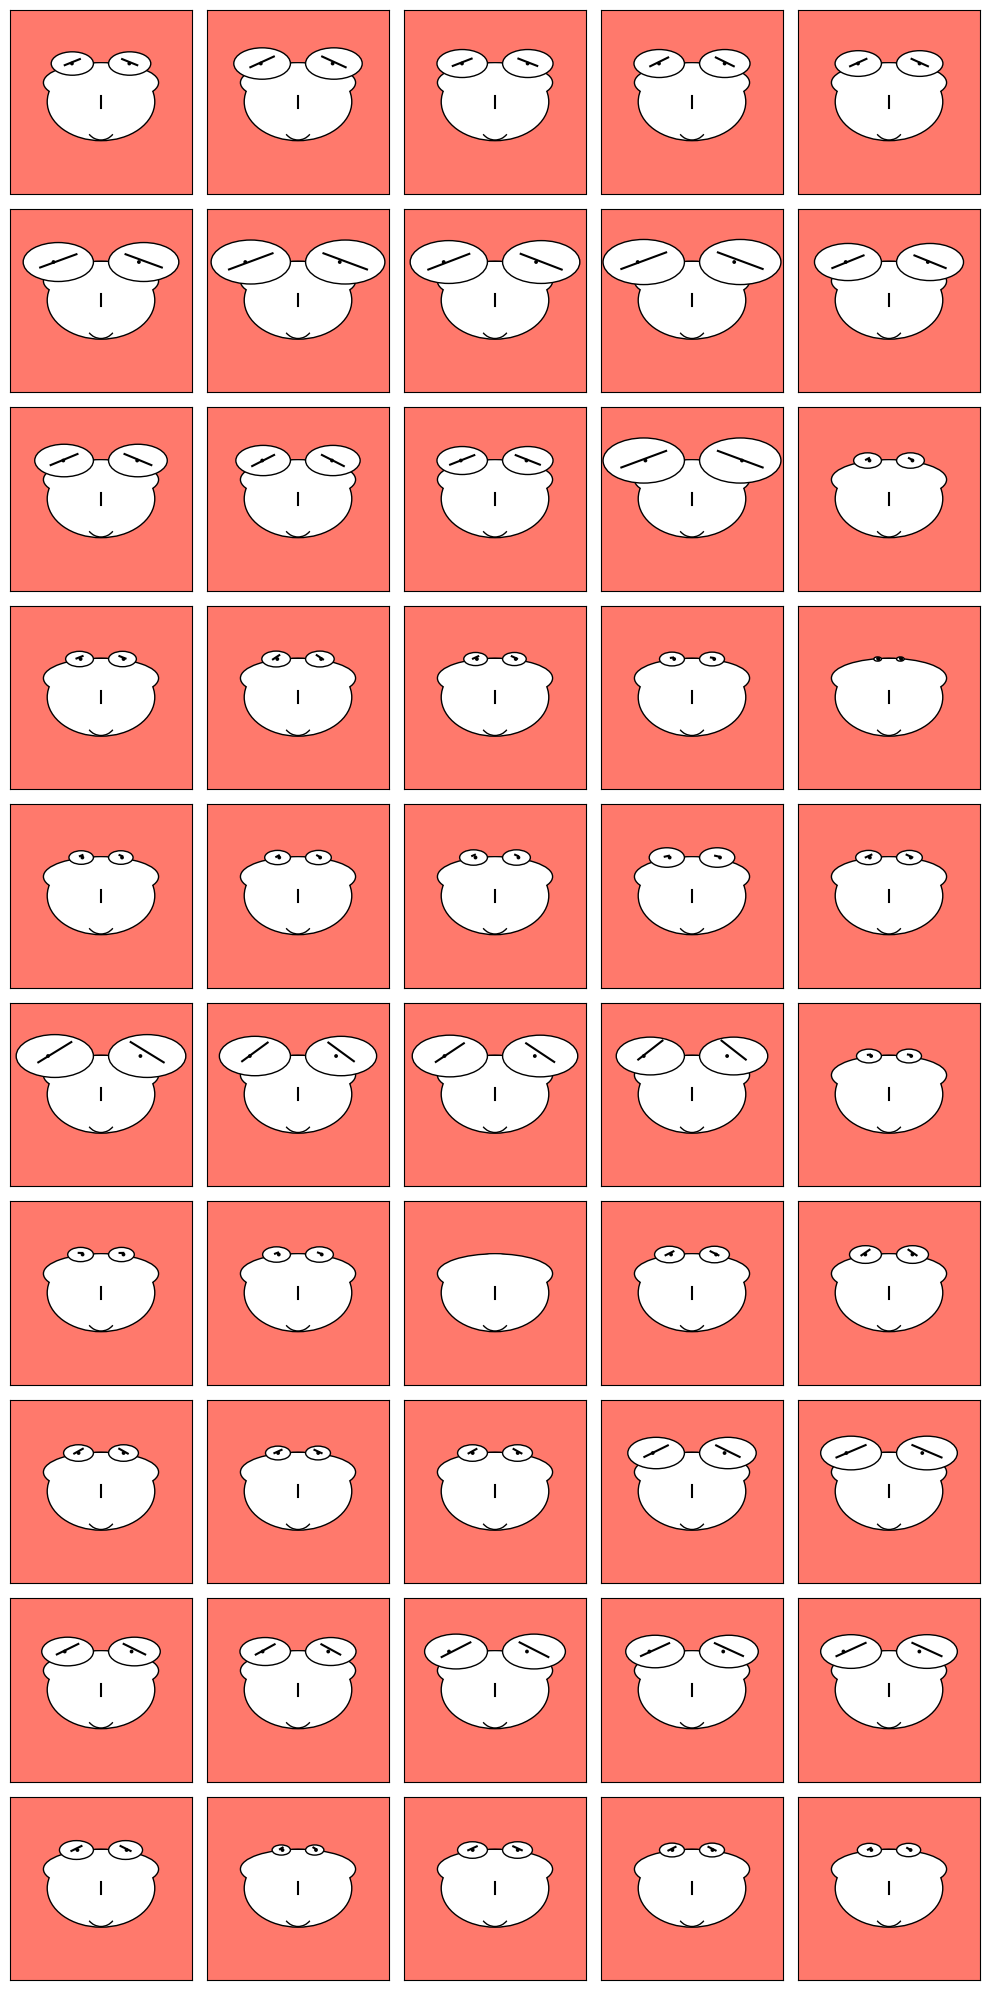

In [ ]:
plt.close('all')
fig, ax = plt.subplots(10, 5, figsize=(10, 20))

# Iterar sobre la cuadrícula de subgráficos y dibujar las caras de Chernoff
for i in range(10):
    for j in range(5):
        # Asumiendo que cada fila de fc_n representa los parámetros para una cara de Chernoff
        cface(ax[i, j], .5, .5, .5, .5, .5, .5, .5, .5, .5, .5, .5, .5, .5,  *fc_n.iloc[j + 5 * i])
        ax[i, j].set_facecolor('xkcd:salmon')
        ax[i, j].axis([-1.2, 1.2, -1.2, 1.2])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

# Mostrar la visualización
plt.tight_layout()
plt.savefig('Ej1_d.png')
plt.show()

In [ ]:
#e)
def stars(ax,params):
  angle=360/len(params)
  X=[]
  Y=[]
  for i in range(1,len(params)+1):
   current_angle=i * angle
   angle_rad = np.deg2rad(current_angle)
   x = abs(params[i-1]) * np.cos(angle_rad)
   y = abs(params[i-1]) * np.sin(angle_rad)
   X.append(x)
   Y.append(y)
   ax.plot([0,x],[0,y])
  X.append(X[0])
  Y.append(Y[0])
  ax.plot(X,Y)


In [ ]:
fc_n_dict = {i: row for i, row in enumerate(fc_n.to_numpy())}

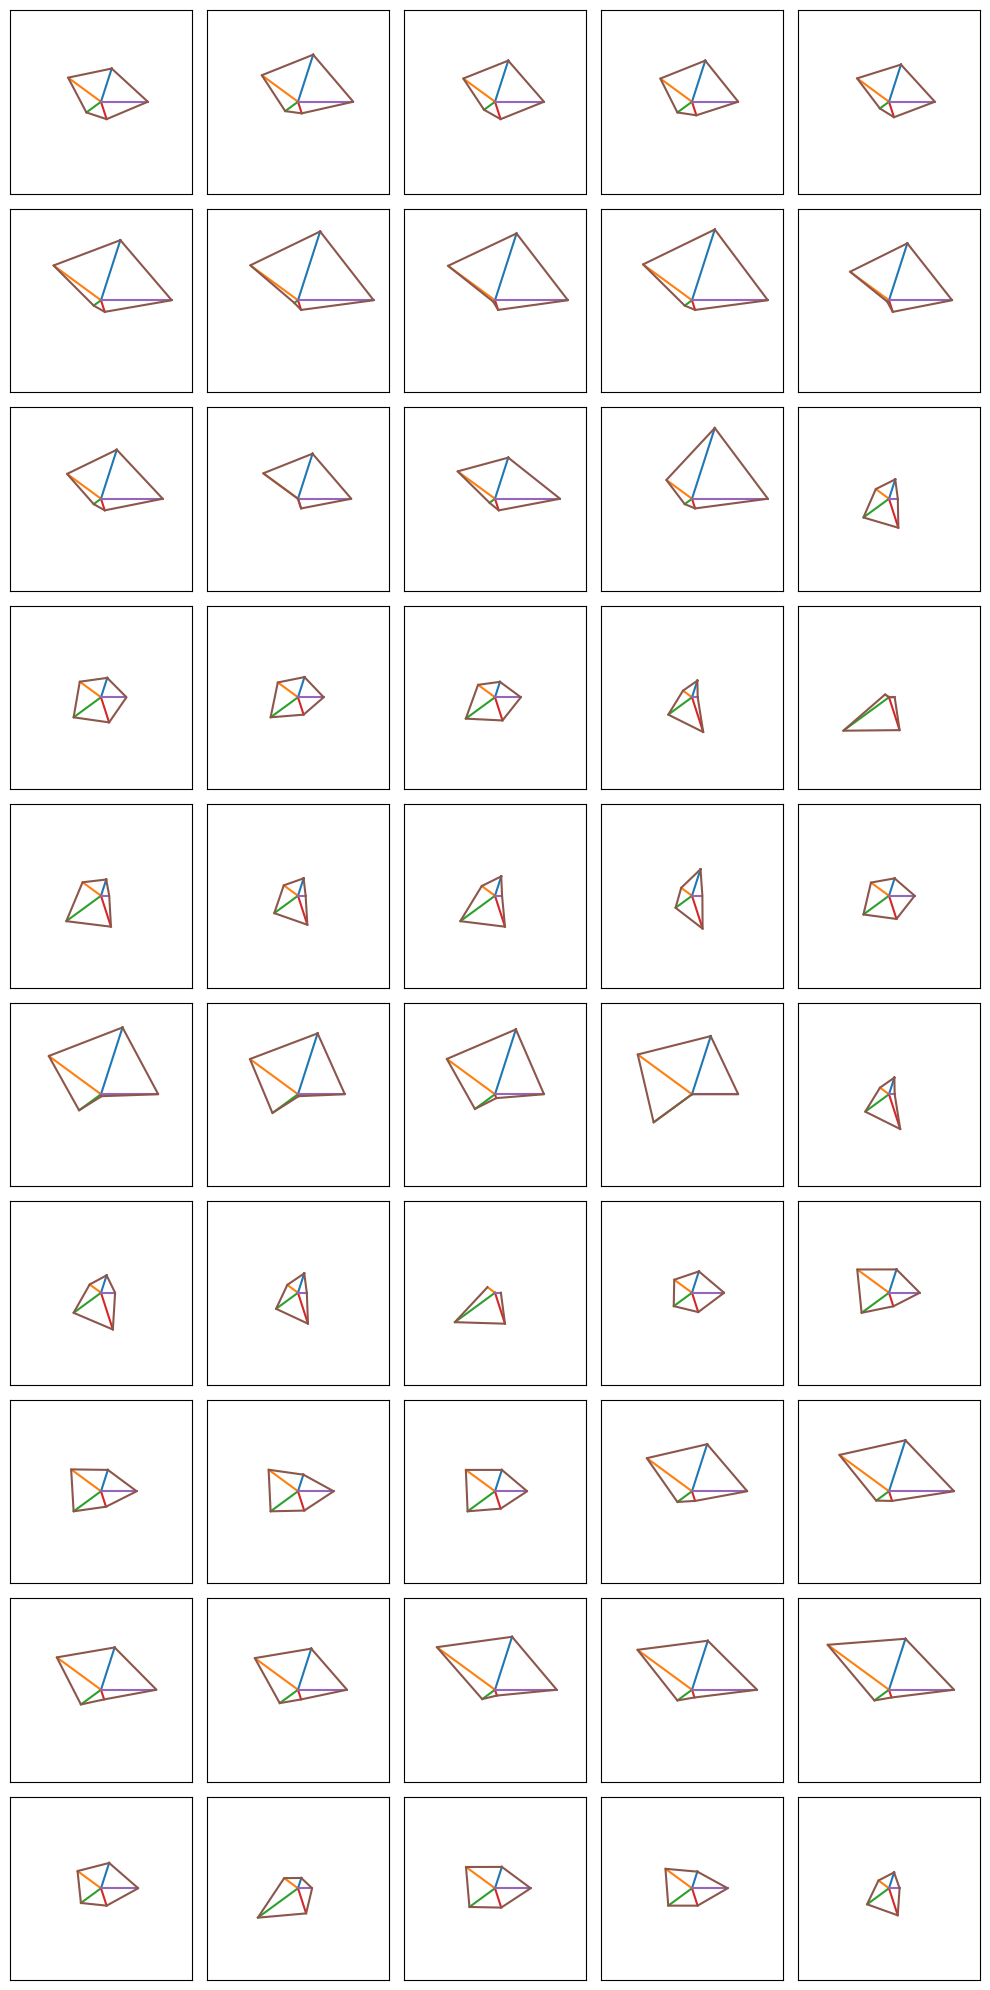

In [ ]:
plt.close('all')
fig, ax = plt.subplots(10, 5, figsize=(10, 20))

# Iterar sobre la cuadrícula de subgráficos y dibujar las caras de Chernoff
for i in range(10):
    for j in range(5):
        # Asumiendo que cada fila de fc_n representa los parámetros para una cara de Chernoff
        stars(ax[i, j], fc_n_dict[j + 5 * i])
        ax[i, j].axis([-1.2, 1.2, -1.2, 1.2])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

# Mostrar la visualización
plt.tight_layout()
plt.savefig('Ej1_e.png')
plt.show()

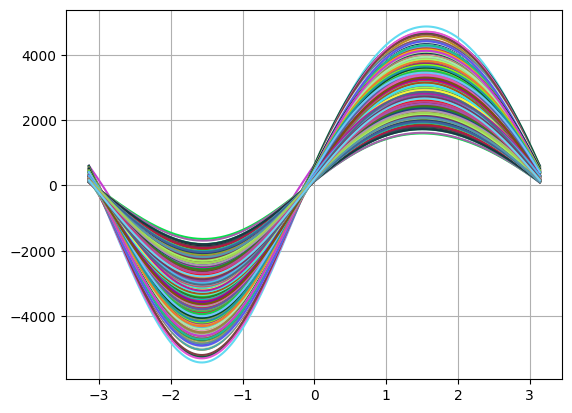

In [ ]:
# f)
fc['name']=mg['name']
fig, ax = plt.subplots()
pd.plotting.andrews_curves(fc, 'name', ax=ax)
ax.legend().set_visible(False)
plt.savefig('Ej1_f.png')
plt.show()

# Ejercicio 2

In [ ]:
fc=fc.drop(['name'],axis=1)

In [ ]:
scaler = StandardScaler()
fc_standardized= fc.copy()

for column in fc_standardized.columns:
    column_data = fc_standardized[column].dropna()
    scaler.fit(column_data.values.reshape(-1, 1))
    fc_standardized[column] = scaler.transform(fc_standardized[column].values.reshape(-1, 1))

In [ ]:
fc_standardized

,horsepower,weight,acceleration,mpg,displacement
0,0.664133,0.630870,-1.295498,-0.706439,1.090604
1,1.574594,0.854333,-1.477038,-1.090751,1.503514
2,1.184397,0.550470,-1.658577,-0.706439,1.196232
3,1.184397,0.546923,-1.295498,-0.962647,1.061796
4,0.924265,0.565841,-1.840117,-0.834543,1.042591
...,...,...,...,...,...
393,-0.480448,-0.213324,0.011586,0.446497,-0.513026
394,-1.364896,-0.993671,3.279296,2.624265,-0.925936
395,-0.532474,-0.798585,-1.440730,1.087017,-0.561039
396,-0.662540,-0.408411,1.100822,0.574601,-0.705077


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


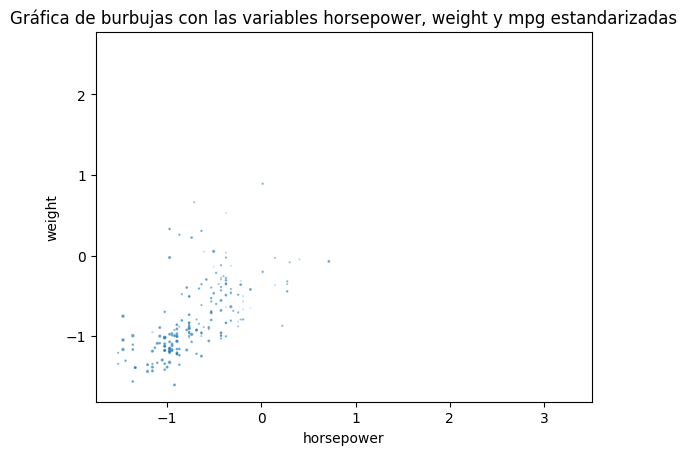

In [ ]:
#a)
plt.scatter(fc_standardized['horsepower'],fc_standardized['weight'],s=fc_standardized['mpg'],alpha=0.5)
plt.xlabel('horsepower')
plt.ylabel('weight')
plt.title('Gráfica de burbujas con las variables horsepower, weight y mpg estandarizadas')
plt.savefig('Ej2_a.png')

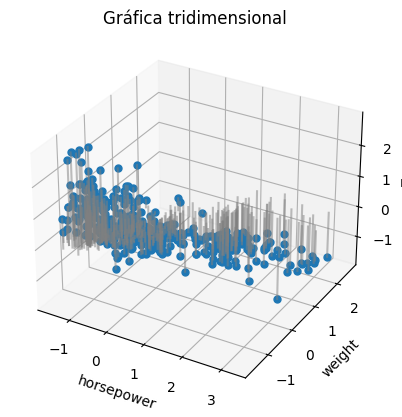

In [ ]:
# b)
# crear ejes y figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en el espacio 3D
ax.plot(fc_standardized['horsepower'], fc_standardized['weight'], fc_standardized['mpg'], marker='o', linestyle='', label='Puntos 3D',markersize=5)

# Graficar líneas desde cada punto hasta el plano XY (z=0)
for i in range(len(mg)):
    x, y, z = fc_standardized.iloc[i][['horsepower', 'weight', 'mpg']]
    ax.plot([x, x], [y, y], [0, z], color='gray',alpha=0.5)

# Etiquetas y título
ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('mpg')
ax.set_title('Gráfica tridimensional')

# Mostrar gráfico
plt.savefig('Ej2_b.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


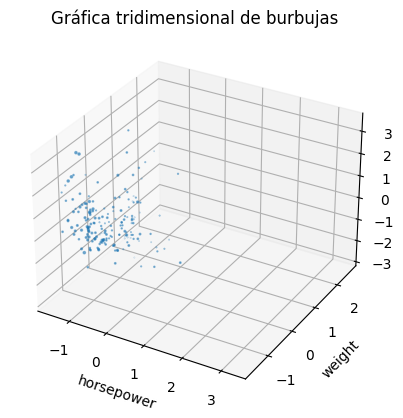

In [ ]:
#c)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(fc_standardized['horsepower'], fc_standardized['weight'], fc_standardized['acceleration'], s=fc_standardized['mpg'],alpha=0.5)



ax.set_xlabel('horsepower')
ax.set_ylabel('weight')
ax.set_zlabel('acceleration')
ax.set_title('Gráfica tridimensional de burbujas')
plt.savefig('Ej2_c.png')
plt.show()

In [ ]:
#d)
#Normalizamos datos
scaler = MinMaxScaler()

fc_n_s = pd.DataFrame(scaler.fit_transform(fc_standardized), columns=fc_standardized.columns)


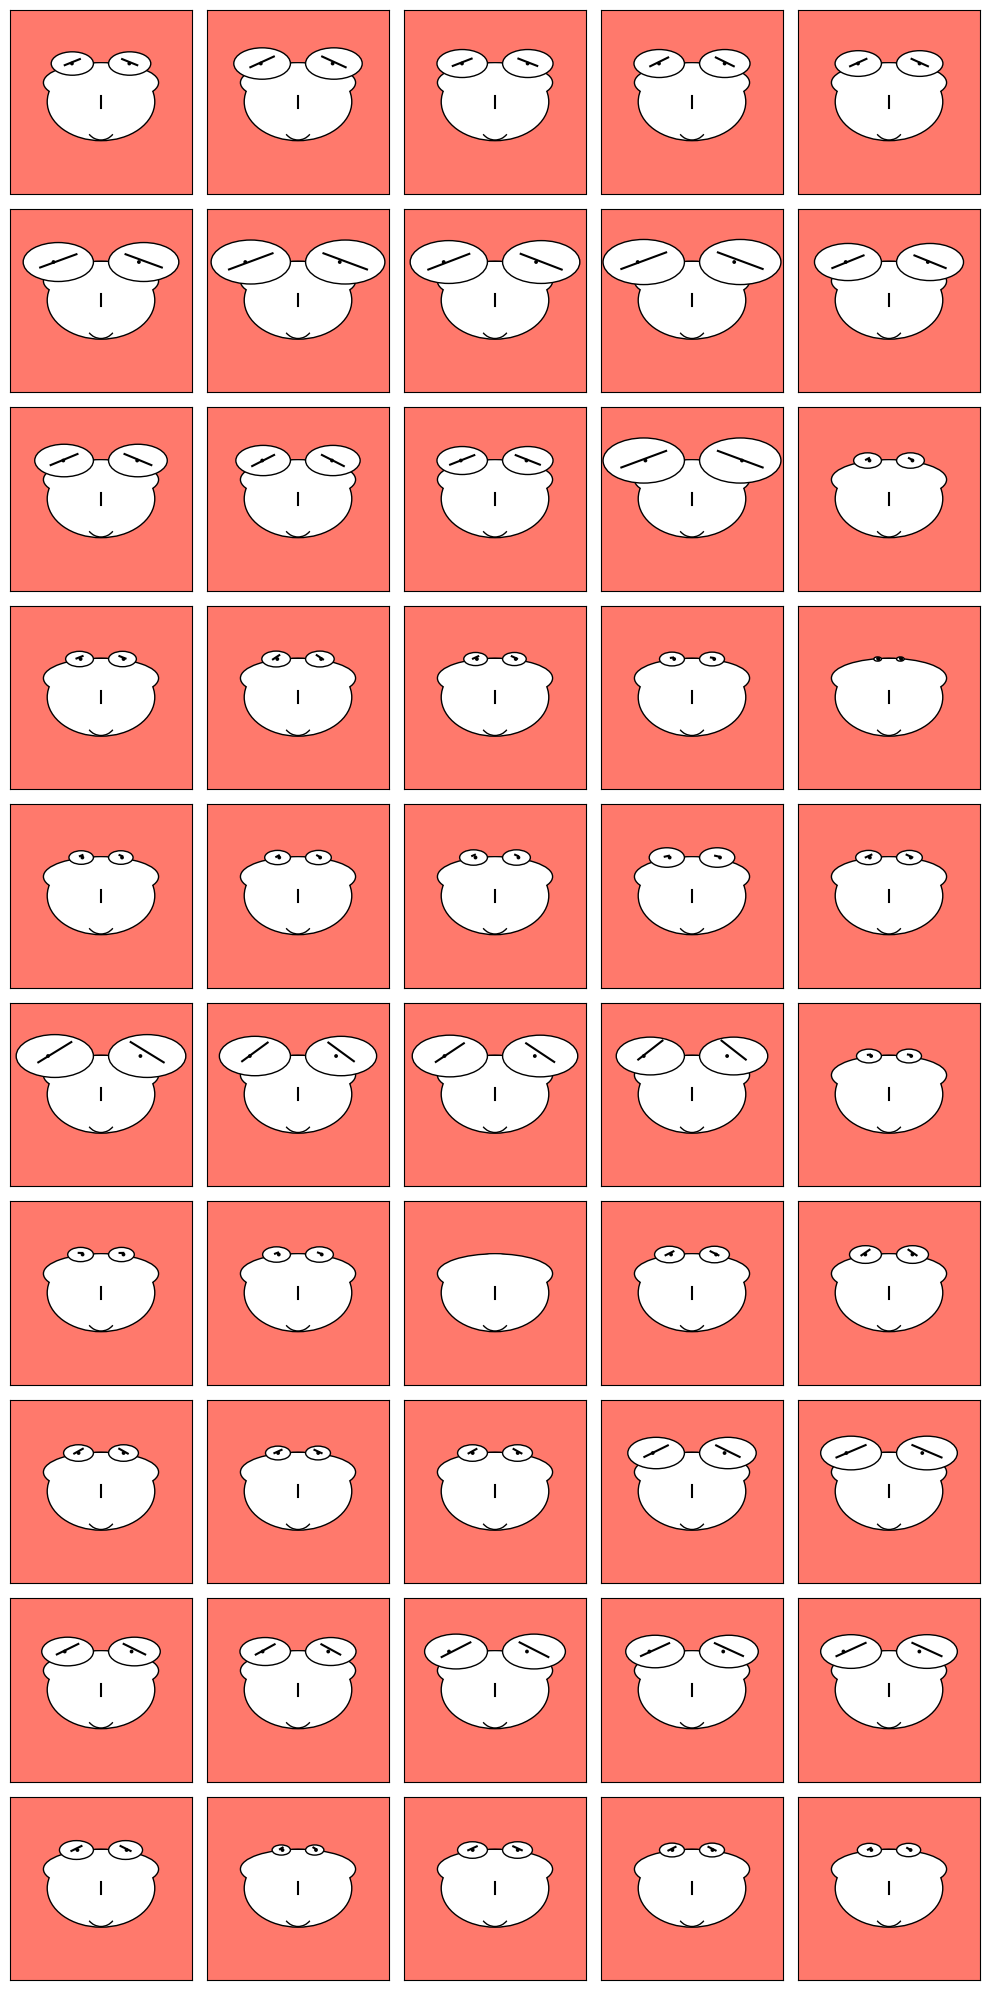

In [ ]:
plt.close('all')
fig, ax = plt.subplots(10, 5, figsize=(10, 20))

# Iterar sobre la cuadrícula de subgráficos y dibujar las caras de Chernoff
for i in range(10):
    for j in range(5):
        # Asumiendo que cada fila de fc_n representa los parámetros para una cara de Chernoff
        cface(ax[i, j], .5, .5, .5, .5, .5, .5, .5, .5, .5, .5, .5, .5, .5,  *fc_n_s.iloc[j + 5 * i])
        ax[i, j].set_facecolor('xkcd:salmon')
        ax[i, j].axis([-1.2, 1.2, -1.2, 1.2])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

# Mostrar la visualización
plt.tight_layout()
plt.show()

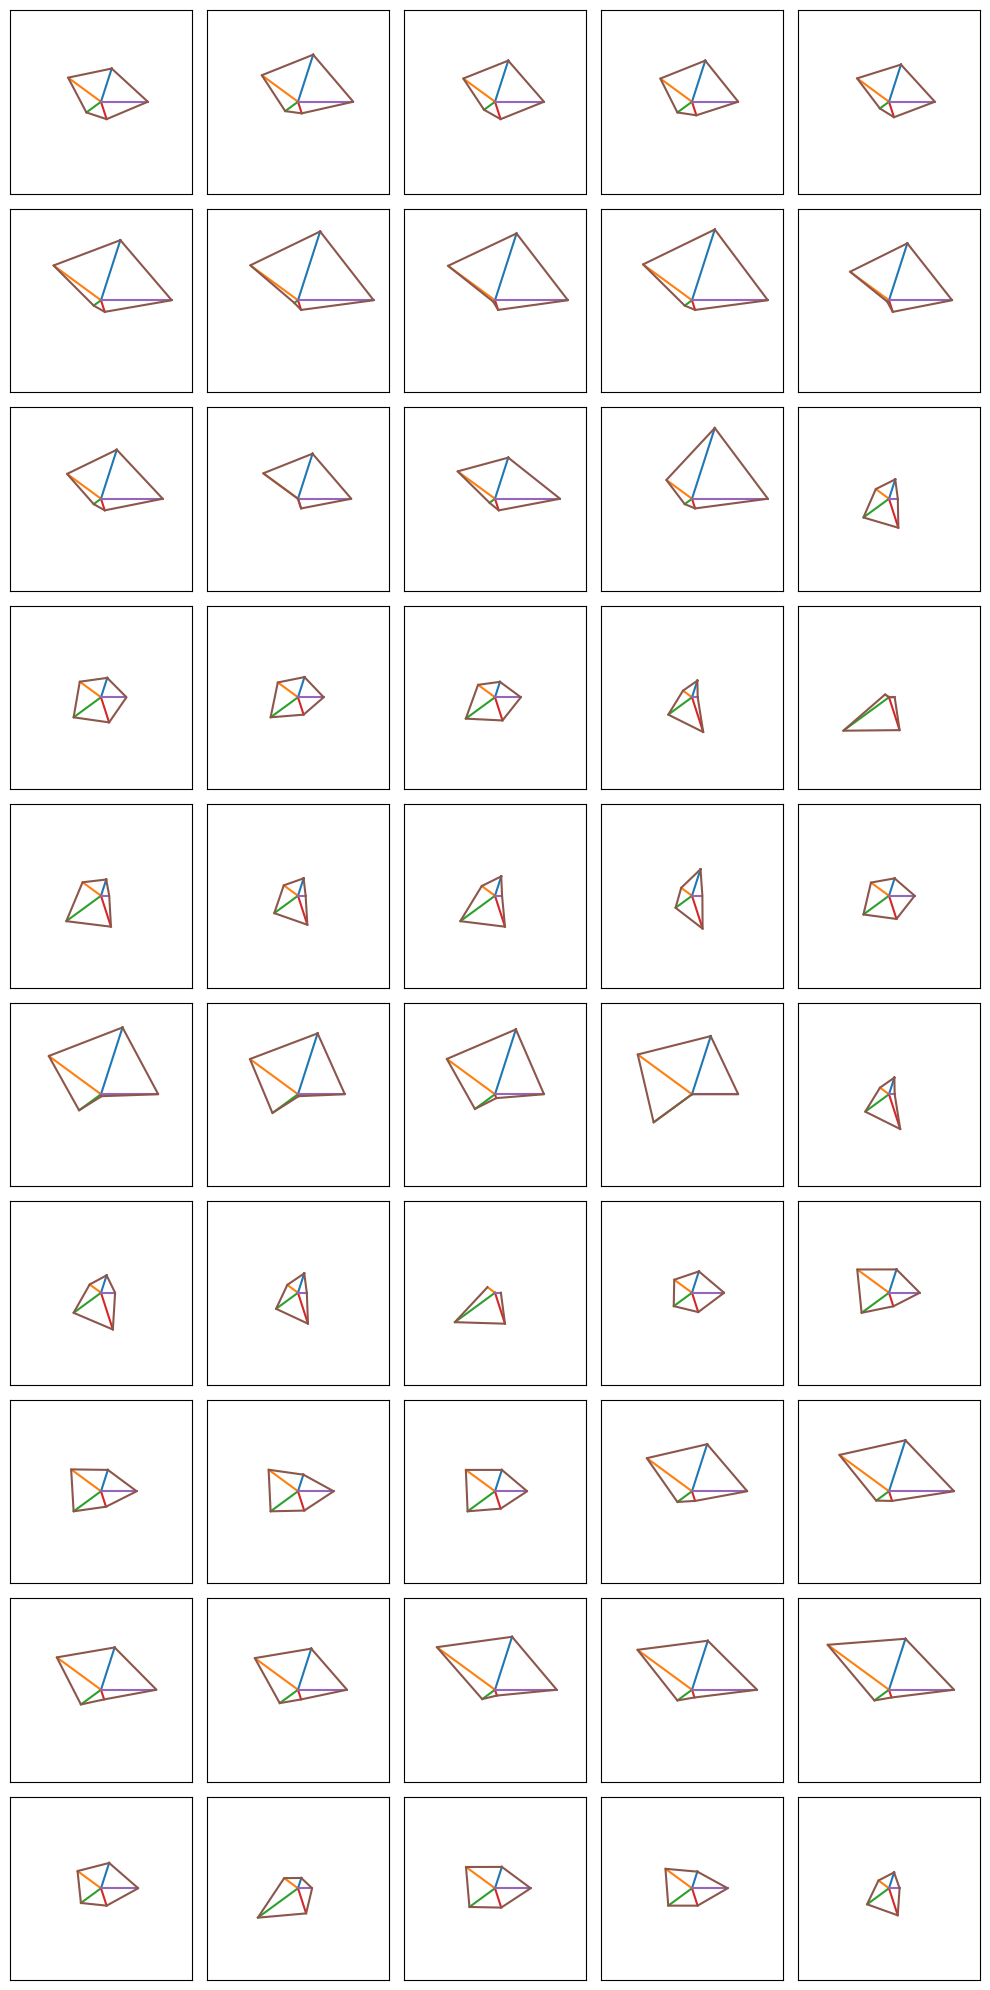

In [ ]:
#e)
plt.close('all')
fig, ax = plt.subplots(10, 5, figsize=(10, 20))

# Iterar sobre la cuadrícula de subgráficos y dibujar las caras de Chernoff
for i in range(10):
    for j in range(5):
        # Asumiendo que cada fila de fc_n representa los parámetros para una cara de Chernoff
        stars(ax[i, j], fc_n_s.iloc[j + 5 * i].values)
        ax[i, j].axis([-1.2, 1.2, -1.2, 1.2])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

# Mostrar la visualización
plt.tight_layout()
plt.show()

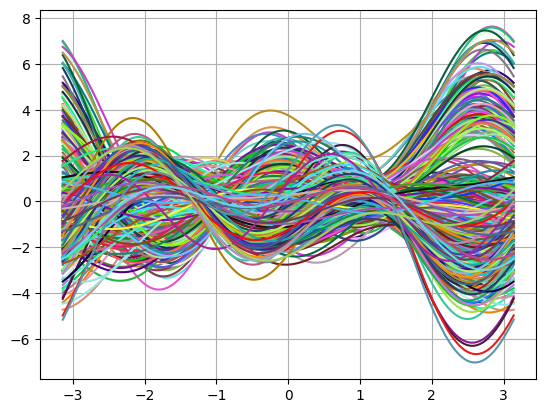

In [ ]:
#f)
fc_standardized['name']=mg['name']
fig, ax = plt.subplots()
pd.plotting.andrews_curves(fc_standardized, 'name', ax=ax)
ax.legend().set_visible(False)
plt.savefig('Ej2_f.png')
plt.show()

#Ejercicio 4

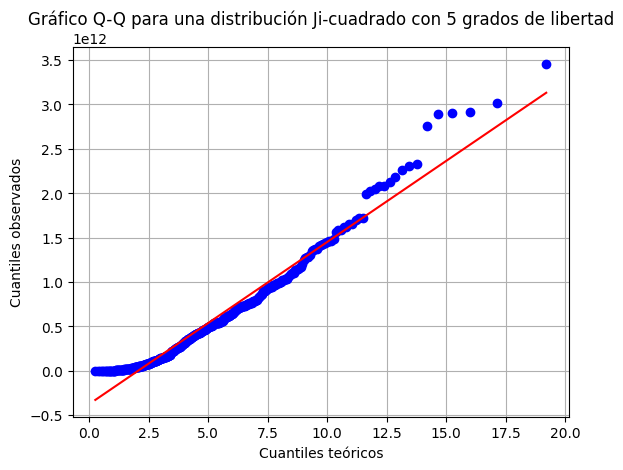

In [ ]:
#c)
import scipy.stats as stats
fc=fc.dropna()
mu = np.mean(fc.values, axis=0)
cov_matrix = np.cov(fc.values, rowvar=False)
U_muestrales=[]
for x in fc.values:
  diferencia =x - mu
  resultado = np.dot(np.dot(diferencia.reshape(1, -1), cov_matrix), diferencia.reshape(-1,1))
  U_muestrales.append(resultado[0][0])
stats.probplot(U_muestrales, dist="chi2", sparams=(5,), plot=plt)
plt.title('Gráfico Q-Q para una distribución Ji-cuadrado con 5 grados de libertad')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.grid(True)
plt.savefig('Ej4_c.png')
plt.show()

# Ejercicio 9

In [ ]:
Big_8=pd.DataFrame({'SCHOOL':['COLORADO','IOWA STATE','KANSAS','KANSAS STATE','MISSOURI','NEBRASKA','OKLAHOMA','OKLAHOMA STATE'],
                    'GAMES':[11,11,11,11,12,12,11,11],'RO_YDS':[291.5,178.,247.1,125.6,107.9,340.,182.2,204.6],
                    'RD_YDS':[114.2,272.8,171.2,167.5,235.3,79.3,148.5,192.5],
                    'PO_YDS':[203.8,137.1,135.8,94.3,138.5,96.7,107.5,130.3],
                    'PD_RAT':[125.2,137.1,135.8,94.3,138.5,96.7,107.5,130.3],
                    'TO_YDS':[495.3,315.1,363.3,363.3,310.4,477.8,356.1,338.1],
                    'TD_YDS':[342.7,460.7,400.7,312.5,414.9,258.8,295.7,385.9],
                    'SO':[36.2,17.5,28.5,27.7,17.3,36.3,19.8,16.4],
                    'SD':[19.2,33.,22.,14.2,27.1,12.1,21.6,23.3],
                    'TOM':[0.55,-0.64,0.73,1.18,0.17,0.08,-0.18,-0.45],
                    'WINS':[10.,0.,6.,9.,3.5,12.,6.,3.5]
                    })

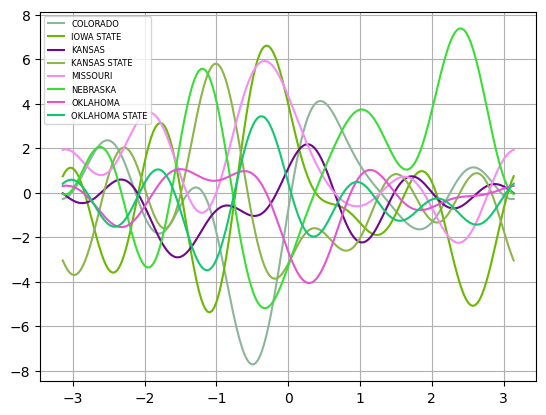

In [ ]:
#a)
scaler = StandardScaler()
Big8_s= Big_8.copy()

for column in Big8_s.columns[1:]:
    column_data = Big8_s[column].dropna()
    scaler.fit(column_data.values.reshape(-1, 1))
    Big8_s[column] = scaler.transform(Big8_s[column].values.reshape(-1, 1))

fig, ax = plt.subplots()
pd.plotting.andrews_curves(Big8_s, 'SCHOOL', ax=ax)
ax.legend(prop={'size': 6})
plt.savefig('Ej9_a.png')
plt.show()

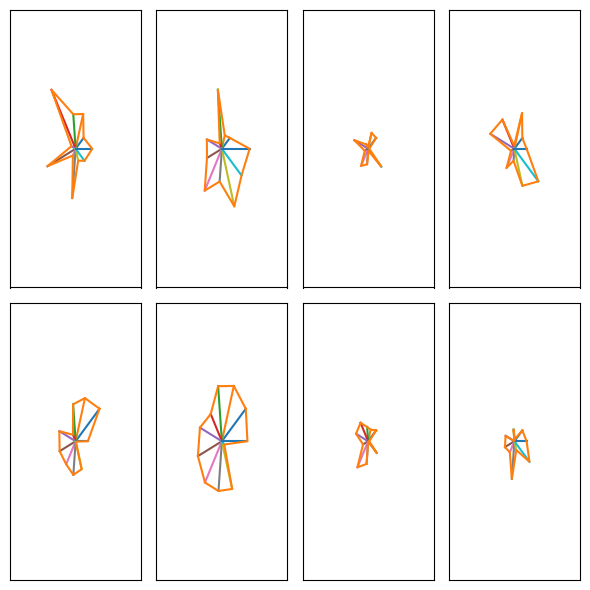

In [ ]:
#b)
plt.close('all')
fig, ax = plt.subplots(2, 4, figsize=(6, 6))

# Iterar sobre la cuadrícula de subgráficos y dibujar las caras de Chernoff
for i in range(2):
    for j in range(4):
        # Asumiendo que cada fila de fc_n representa los parámetros para una cara de Chernoff
        stars(ax[i, j], Big8_s.iloc[j + 4 * i].values[1:])
        ax[i, j].axis([-4, 4, -4, 4])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

# Mostrar la visualización
plt.tight_layout()
plt.savefig('Ej9_b.png')
plt.show()

In [ ]:
Big8_s

,SCHOOL,GAMES,RO_YDS,RD_YDS,PO_YDS,PD_RAT,TO_YDS,TD_YDS,SO,SD,TOM,WINS
0,COLORADO,-0.577350,1.100535,-1.004629,2.250004,0.262710,1.788588,-0.255913,1.437050,-0.377085,0.643065,1.015928
1,IOWA STATE,-0.577350,-0.424859,1.720778,0.202592,0.953594,-0.945694,1.598133,-0.954304,1.825569,-1.425171,-1.693214
2,KANSAS,-0.577350,0.503817,-0.025132,0.162688,0.878119,-0.214327,0.655397,0.452375,0.069831,0.955908,-0.067729
3,KANSAS STATE,-0.577350,-1.129094,-0.088713,-1.111189,-1.531266,-0.214327,-0.730423,0.350071,-1.175148,1.738014,0.745014
4,MISSOURI,1.732051,-1.366975,1.076372,0.245567,1.034875,-1.017010,0.878511,-0.979880,0.883855,-0.017380,-0.745014
5,NEBRASKA,1.732051,1.752355,-1.604356,-1.037519,-1.391928,1.523050,-1.574172,1.449838,-1.510334,-0.173801,1.557757
6,OKLAHOMA,-0.577350,-0.368413,-0.415212,-0.706004,-0.764907,-0.323577,-0.994389,-0.660180,0.005985,-0.625685,-0.067729
7,OKLAHOMA STATE,-0.577350,-0.067366,0.340891,-0.006139,0.558803,-0.596702,0.422856,-1.094972,0.277327,-1.094949,-0.745014


In [ ]:
#c)
plt.close('all')
#Normalizamos datos
scaler = MinMaxScaler()
Big8_s_n = pd.DataFrame(scaler.fit_transform(Big8_s.iloc[:,1:]), columns=Big8_s.columns[1:])


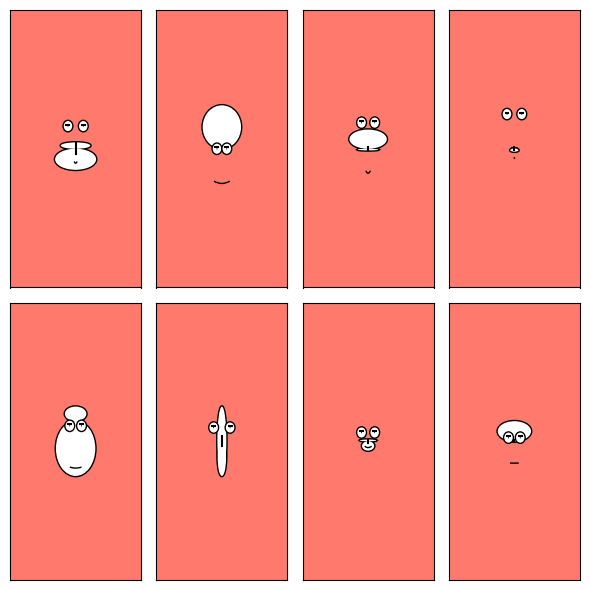

In [ ]:

fig, ax = plt.subplots(2, 4, figsize=(6, 6))

# Iterar sobre la cuadrícula de subgráficos y dibujar las caras de Chernoff
for i in range(2):
    for j in range(4):
        # Asumiendo que cada fila de fc_n representa los parámetros para una cara de Chernoff
        cface(ax[i, j], *Big8_s_n.iloc[j + 4 * i],.5, .5, .5, .5, .5, .5, .5 )
        ax[i, j].set_facecolor('xkcd:salmon')
        ax[i, j].axis([-4, 4, -4, 4])
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

# Mostrar la visualización
plt.tight_layout()
plt.savefig('Ej9_c.png')
plt.show()

# Ejercicio 10



In [ ]:
X=[[341,69,139,'yes','QI'],
 [135,79,169,'no','QI'],
  [197,94,164,'no','CI'],
   [110,59,135,'yes','CI'],
    [94,58,70,'no','CI'],
     [154,54,109,'yes','QI'],
      [127,59,79,'yes','CI'],
       [84,44,64,'no','CI'],
        [118,59,150,'yes','CI'],
         [162,59,74,'yes','CI'],
          [254,59,125,'yes','QI'],
           [207,60,99,'yes','QI'],
            [148,49,86,'yes','CI'],
             [188,65,85,'yes','CI'],
              [92,49,72,'yes','CI'],
               [141,59,91,'yes','QI'],
                [398,39,149,'yes','QI'],
                 [126,64,95,'no','CI'],
                  [140,59,85,'yes','CI'],
                   [103,59,105,'no','CI'],
                    [212,49,95,'yes','CI'],
                     [121,62,72,'yes','QI'],
                      [109,50,75,'yes','QI'],
                       [250,45,79,'yes','CI'],
                        [95,59,65,'no','CI']]

In [ ]:
Hotels = pd.DataFrame(X, columns=['ROOMS', 'MIN', 'MAX','P','H'])
Hotels

,ROOMS,MIN,MAX,P,H
0,341,69,139,yes,QI
1,135,79,169,no,QI
2,197,94,164,no,CI
3,110,59,135,yes,CI
4,94,58,70,no,CI
5,154,54,109,yes,QI
6,127,59,79,yes,CI
7,84,44,64,no,CI
8,118,59,150,yes,CI
9,162,59,74,yes,CI


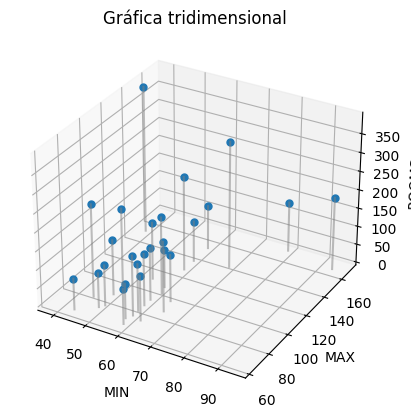

In [ ]:
# a)
# crear ejes y figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en el espacio 3D
ax.plot( Hotels['MIN'], Hotels['MAX'],Hotels['ROOMS'], marker='o', linestyle='', label='Puntos 3D',markersize=5)

# Graficar líneas desde cada punto hasta el plano XY (z=0)
for i in range(len(Hotels)):
  x, y, z = Hotels.iloc[i][[ 'MIN','MAX','ROOMS']]
  ax.plot([x, x], [y, y], [0, z], color='gray',alpha=0.5)


# Etiquetas y título
ax.set_xlabel('MIN')
ax.set_ylabel('MAX')
ax.set_zlabel('ROOMS')
ax.set_title('Gráfica tridimensional')

# Mostrar gráfico
plt.savefig('Ej10_a.png')
plt.show()

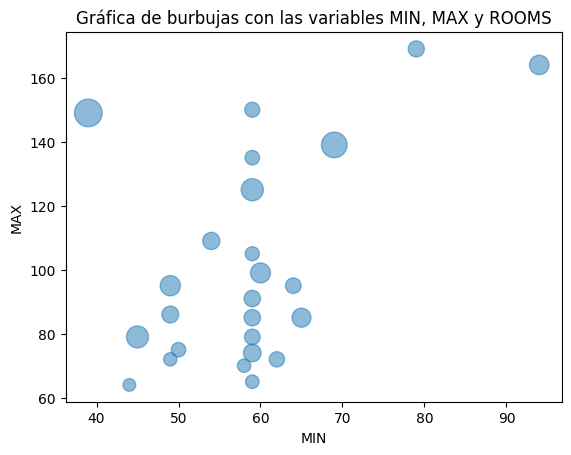

In [ ]:
plt.scatter(Hotels['MIN'], Hotels['MAX'],s=Hotels['ROOMS'],alpha=0.5)
plt.xlabel('MIN')
plt.ylabel('MAX')
plt.title('Gráfica de burbujas con las variables MIN, MAX y ROOMS')
plt.savefig('Ej10_b.png')

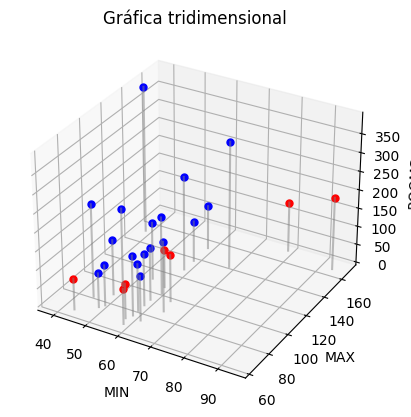

In [ ]:
# c)
# crear ejes y figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
H_Y=Hotels[Hotels['P']=='yes']
H_N=Hotels[Hotels['P']=='no']
# Graficar los puntos en el espacio 3D
ax.plot( H_Y['MIN'], H_Y['MAX'],H_Y['ROOMS'], marker='o', linestyle='', label='Puntos 3D',markersize=5,color='blue')
ax.plot( H_N['MIN'], H_N['MAX'],H_N['ROOMS'], marker='o', linestyle='', label='Puntos 3D',markersize=5,color='red')
# Graficar líneas desde cada punto hasta el plano XY (z=0)
for i in range(len(H_Y)):
  x, y, z = H_Y.iloc[i][[ 'MIN','MAX','ROOMS']]
  ax.plot([x, x], [y, y], [0, z], color='gray',alpha=0.5)
for i in range(len(H_N)):
  x, y, z = H_N.iloc[i][[ 'MIN','MAX','ROOMS']]
  ax.plot([x, x], [y, y], [0, z], color='gray',alpha=0.5)

# Etiquetas y título
ax.set_xlabel('MIN')
ax.set_ylabel('MAX')
ax.set_zlabel('ROOMS')
ax.set_title('Gráfica tridimensional')
plt.savefig('Ej10_c.png')

# Ejercicio 11

In [ ]:
C=['ABERDEEN','ANKARA','AUCKLAND','BERLIN','BONN','BUENOS AIRES','CALGARY','CASABLANCA'
,'DUBLIN','GENEVA','JERUSALEM','LIMA','LONDON','MECCA','MONTREAL','NAIROBI','NICE','RIO DE JANEIRO'
,'ROME','SEOUL','STOCKHOLM','TAIPET','TORONTO','WARSAW','AMSTERDAM','ATHENS','BEIJING','BOGOTA','BRUSSELS'
,'CAIRO','CARACAS','COPENHACEN','FRANKFURT','HONG KONG','KIEV','LISBON','MADRID','MEXICO CITY','MOSCOW',
   'NEW DELHI','PARIS 7','RIYADH','SAO PAULO','SOFIA','SYDNEY','TOKYO','VIENNA','WINNIPEG']

T=np.array([[75,54,63],[88,55,88],[50,50,58],[70,54,72],[77,54,73],[46,39,61],[72,41,72],[79,72,81],[75,61,66]
   ,[77,61,75],[84,66,88],[64,59,63],[86,64,70],[100,86,102],[88,66,77],[68,55,70],[81,70,81],[100,66,75],
   [86,64,86],[93,75,88],[73,52,66],[85,75,91],[90,66,79],[66,54,73],[75,52,68],[88,75,91],[84,68,86],
   [68,43,64],[75,54,72],[93,71,95],[82,70,88],[68,55,70],[77,59,75],[84,79,88],[82,59,73],[90,70,82],[95,68,90],
    [73,57,73],[61,54,72],[93,81,93],[79,57,75],[111,81,108],[88,63,66],[81,61,79],[68,46,63],[93,81,86],
   [72,57,79],[90,63,75]])

In [ ]:
Temperatures=pd.DataFrame({'CITY':C,'HIGH':T[:,0],'LOW':T[:,1],'NORMAL_HIGH':T[:,2]})
Temperatures

,CITY,HIGH,LOW,NORMAL_HIGH
0,ABERDEEN,75,54,63
1,ANKARA,88,55,88
2,AUCKLAND,50,50,58
3,BERLIN,70,54,72
4,BONN,77,54,73
5,BUENOS AIRES,46,39,61
6,CALGARY,72,41,72
7,CASABLANCA,79,72,81
8,DUBLIN,75,61,66
9,GENEVA,77,61,75


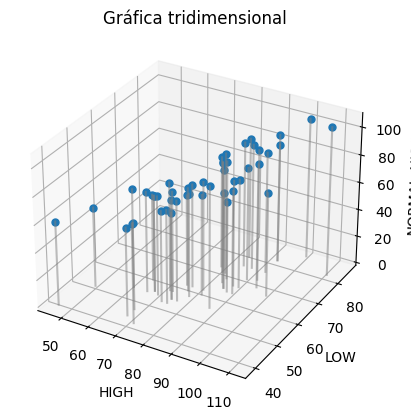

In [ ]:
# a)
# crear ejes y figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en el espacio 3D
ax.plot( Temperatures['HIGH'], Temperatures['LOW'],Temperatures['NORMAL_HIGH'], marker='o', linestyle='', label='Puntos 3D',markersize=5)

# Graficar líneas desde cada punto hasta el plano XY (z=0)
for i in range(len(Temperatures)):
  x, y, z = Temperatures.iloc[i][[ 'HIGH','LOW','NORMAL_HIGH']]
  ax.plot([x, x], [y, y], [0, z], color='gray',alpha=0.5)


# Etiquetas y título
ax.set_xlabel('HIGH')
ax.set_ylabel('LOW')
ax.set_zlabel('NORMAL_HIGH')
ax.set_title('Gráfica tridimensional')

# Mostrar gráfico
plt.savefig('Ej11_a.png')
plt.show()

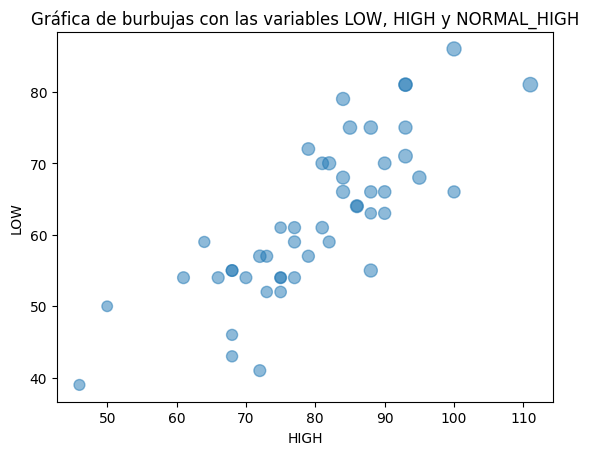

In [ ]:
plt.scatter(Temperatures['HIGH'], Temperatures['LOW'],s=Temperatures['NORMAL_HIGH'],alpha=0.5)
plt.xlabel('HIGH')
plt.ylabel('LOW')
plt.title('Gráfica de burbujas con las variables LOW, HIGH y NORMAL_HIGH')
plt.savefig('Ej11_b.png')

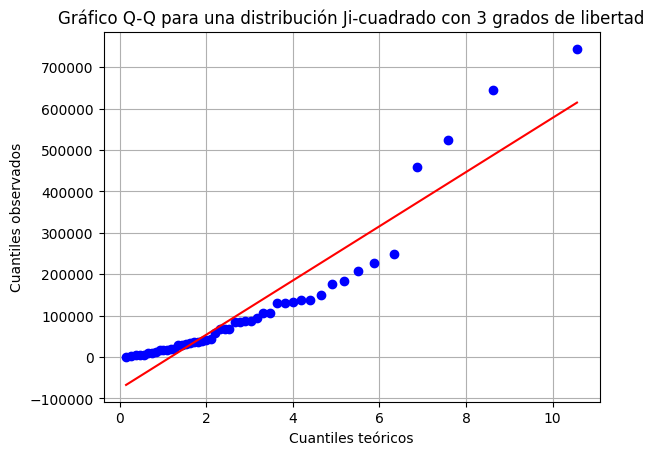

In [ ]:
#c)
import scipy.stats as stats
fc=Temperatures.iloc[:,1:].dropna()
mu = np.mean(fc.values, axis=0)
cov_matrix = np.cov(fc.values, rowvar=False)
U_muestrales=[]
for x in fc.values:
  diferencia =x - mu
  resultado = np.dot(np.dot(diferencia.reshape(1, -1), cov_matrix), diferencia.reshape(-1,1))
  U_muestrales.append(resultado[0][0])
stats.probplot(U_muestrales, dist="chi2", sparams=(3,), plot=plt)
plt.title('Gráfico Q-Q para una distribución Ji-cuadrado con 3 grados de libertad')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles observados')
plt.grid(True)
plt.savefig('Ej12.png')
plt.show()